In [30]:
!pip install yfinance==0.1.74

In [31]:
!pip install mplcyberpunk

In [32]:
!pip install pandas

In [33]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import smtplib
from email.message import EmailMessage

In [34]:
ativos = ["^BVSP" , "BRL=X"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)


[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-04-07    4.7152  118862.0  4.7152  118862.0  4.7699  119247.0  4.690400   
2022-04-08    4.7521  118322.0  4.7521  118322.0  4.7913  118868.0  4.707518   
2022-04-11    4.6981  116953.0  4.6981  116953.0  4.7326  118320.0  4.684016   
2022-04-12    4.6936  116147.0  4.6936  116147.0  4.6971  118615.0  4.621500   
2022-04-13    4.6731  116782.0  4.6731  116782.0  4.7023  117329.0  4.653200   
...              ...       ...     ...       ...     ...       ...       ...   
2023-04-03    5.0623  101506.0  5.0623  101506.0  5.0755  101916.0  5.036216   
2023-04-04    5.0631  101869.0  5.0631  101869.0  5.0976  103056.0  5.048277   
2023-04-05    5.0707  100978.0  5.0707  100978.0  5.0743  101960.0  5.027504   
2023-04-06    5.0332  100822.0  5.0332  100822.0  5.0789  101628.0  5.028911   
2023-04-07    5.0583       NaN  5.0583       NaN  5.0585       NaN  5.004350   

                        Open           Volume              
               ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                       
2022-04-07  117509.0  4.7152  118226.0      0  11520100.0  
2022-04-08  117487.0  4.7521  118861.0      0  11225800.0  
2022-04-11  116953.0  4.6980  118320.0      0   9558400.0  
2022-04-12  116054.0  4.6936  116963.0      0  11406800.0  
2022-04-13  116150.0  4.6731  116150.0      0  12070500.0  
...              ...     ...       ...    ...         ...  
2023-04-03  100651.0  5.0623  101883.0      0  12794800.0  
2023-04-04  101505.0  5.0631  101505.0      0  11695800.0  
2023-04-05   99898.0  5.0707  101869.0      0  13256500.0  
2023-04-06  100443.0  5.0332  100978.0      0   9818500.0  
2023-04-07       NaN  5.0583       NaN      0         NaN  

[262 rows x 12 columns]

In [35]:
dados_fechamento = dados_mercado["Adj Close"]
dados_fechamento.columns = ["dolar", "ibovespa"]
dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2022-04-07,4.7152,118862.0
2022-04-08,4.7521,118322.0
2022-04-11,4.6981,116953.0
2022-04-12,4.6936,116147.0
2022-04-13,4.6731,116782.0
...,...,...
2023-03-31,5.0927,101882.0
2023-04-03,5.0623,101506.0
2023-04-04,5.0631,101869.0


In [36]:
dados_fechamento_mensal = dados_fechamento.resample("M").last()
dados_fechamento_anual = dados_fechamento. resample("y").last()

dados_fechamento_anual

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0332,100822.0


In [37]:
retorno_no_ano = dados_fechamento_anual.pct_change().dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change().dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

retorno_no_dia

,dolar,ibovespa
Date,,
2022-04-08,0.007826,-0.004543
2022-04-11,-0.011363,-0.011570
2022-04-12,-0.000958,-0.006892
2022-04-13,-0.004368,0.005467
2022-04-14,0.003659,-0.005138
...,...,...
2023-03-31,-0.008083,-0.017654
2023-04-03,-0.005969,-0.003691
2023-04-04,0.000158,0.003576


In [38]:
retorno_dia_dolar = retorno_no_dia.iloc[-1,0]
retorno_dia_ibovespa = retorno_no_dia.iloc[-1,1]

retorno_mes_dolar = retorno_no_mes.iloc[-1,0]
retorno_mes_ibovespa = retorno_no_mes.iloc[-1,1]

retorno_ano_dolar = retorno_no_ano.iloc[-1,0]
retorno_ano_ibovespa = retorno_no_ano.iloc[-1,1]

retorno_ano_dolar

-0.044353334637057595

In [39]:
retorno_dia_dolar = round(retorno_dia_dolar* 100, 2)
retorno_dia_ibovespa = round(retorno_dia_ibovespa* 100, 2)

retorno_mes_dolar = round(retorno_mes_dolar* 100, 2)
retorno_mes_ibovespa = round(retorno_mes_ibovespa*100, 2)

retorno_ano_dolar = round(retorno_ano_dolar* 100, 2)
retorno_ano_ibovespa = round(retorno_ano_ibovespa* 100, 2)


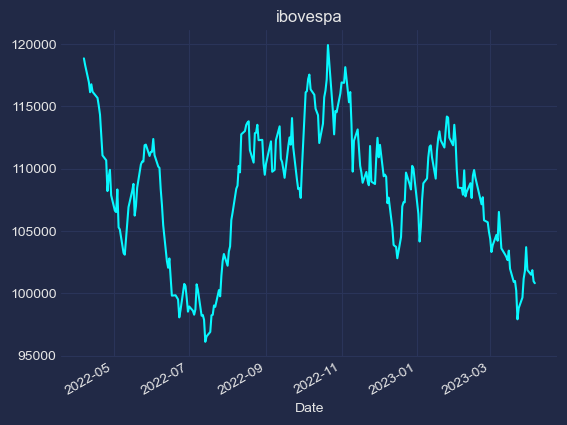

In [40]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)

plt.title('ibovespa')

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

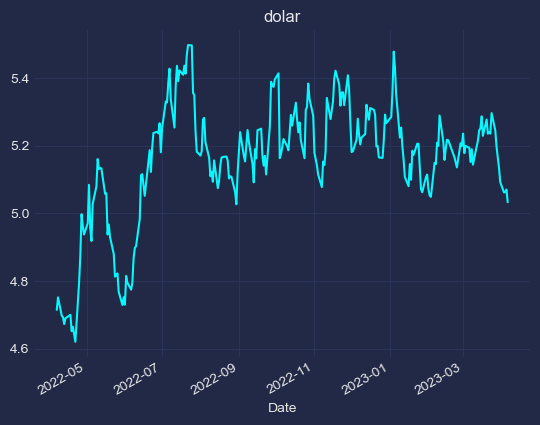

In [41]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)

plt.title('dolar')

plt.savefig('dolar.png', dpi = 300)

plt.show()

In [42]:
import os
from dotenv import load_dotenv

In [43]:
load_dotenv()

True

In [75]:
email = "afs.souza2014@gmail.com"
senha_email = os.environ.get("senha")
print(email, senha_email)

afs.souza2014@gmail.com vdrpsaupwklckwzx


In [69]:
msg = EmailMessage()
msg["Subject"] = "Enviando e-mail com o Python"
msg["From"] = "afs.souza2014@gmail.com"
msg["To"] = "afs.souza2018@gmail.com"

msg.set_content(f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_ano_ibovespa}%, 
enquanto no mês a rentabilidade é de {retorno_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_dia_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_ano_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_dia_dolar}%.


Abs,

O melhor estagiário do mundo

''')

In [70]:
with open("dolar.png", "rb") as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [77]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, senha)
    smtp.send_message(msg)

In [ ]:
*.bundle.*
lib/
node_modules/
*.egg-info/
.ipynb_checkpoints
*.tsbuildinfo

# Created by https://www.gitignore.io/api/python
# Edit at https://www.gitignore.io/?templates=python

### Python ###
# Byte-compiled / optimized / DLL files
__pycache__/
*.py[cod]
*$py.class

# C extensions
*.so

# Distribution / packaging
.Python
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
wheels/
pip-wheel-metadata/
share/python-wheels/
.installed.cfg
*.egg
MANIFEST

# PyInstaller
#  Usually these files are written by a python script from a template
#  before PyInstaller builds the exe, so as to inject date/other infos into it.
*.manifest
*.spec

# Installer logs
pip-log.txt
pip-delete-this-directory.txt

# Unit test / coverage reports
htmlcov/
.tox/
.nox/
.coverage
.coverage.*
.cache
nosetests.xml
coverage.xml
*.cover
.hypothesis/
.pytest_cache/

# Translations
*.mo
*.pot

# Scrapy stuff:
.scrapy

# Sphinx documentation
docs/_build/

# PyBuilder
target/

# pyenv
.python-version

# celery beat schedule file
celerybeat-schedule

# SageMath parsed files
*.sage.py

# Spyder project settings
.spyderproject
.spyproject

# Rope project settings
.ropeproject

# Mr Developer
.mr.developer.cfg
.project
.pydevproject

# mkdocs documentation
/site

# mypy
.mypy_cache/
.dmypy.json
dmypy.json

# Pyre type checker
.pyre/

# OS X stuff
*.DS_Store

# End of https://www.gitignore.io/api/python

_temp_extension
junit.xml
[uU]ntitled*
notebook/static/*
!notebook/static/favicons
notebook/labextension
notebook/schemas
docs/source/changelog.md
docs/source/contributing.md

# playwright
ui-tests/test-results
ui-tests/playwright-report

# VSCode
.vscode

# RTC
.jupyter_ystore.db

# yarn >=2.x local files
.yarn/*
.pnp.*
ui-tests/.yarn/*
ui-tests/.pnp.*

#env
.env